# _Project Data Science BIPM Missed Appointments_

## 1. General Information

- Group name on Kaggle : Data Detectives
- Student Names with Student ID : Fernanda Souza Dalmolin(), Victor Barbay(), Yasmin Hilles(), Buket Bayar()

## 2. Business Understanding

- Problem: Many patients miss their scheduled appointments.
- Goal: Develop a machine learning model that predicts if a patient will miss a future appointment.
- Assumptions: Older patients, people who does not get a reminder are more tend to miss apointments, the closer the appointment date to schedule data make people more likely to go to their appointments.

The problem identified by the hospital was that many patients miss their scheduled appointments, which leads to inefficiencies in the healthcare industry. The goal of this project is to develop a machine learning model that predicts if a patient will miss a future appointment. 

## 3. Data Understanding (Exploratory Data Analysis)
### 3.1 Description of the data set: 
- There are 13 columns with 3 numerical and 10 categorical columns.
- There are columns with Missing Values: 5 (Age, Community, Social Walfare, Hypertension, Alcoholism)

The dataset we were given is a dataset from a Brazilian hospital (identified by the neighborhoods mentioned). The dataset consists of 88,42 entries with 14 columns. 11 are categorical values, and 3 of these columns contain numerical values. The dataset contains information about patient appointments in a determinate hospital, the dataset contains a range of personal data from people and also whether that specific patient showed up for their appointment or not.


The columns in the original dataset are: 
- PatientId: Unique identifier for each patient (numerical).
- AppointmentID: Unique identifier for each appointment (numerical).
- Sex: Gender of the patient (categorical, 'M' for male, 'F' for female).
- ScheduledDate: Date and time when the appointment was scheduled (categorical).
- AppointmentDate: Date of the scheduled appointment (categorical).
- Age: Age of patient (numerical).
- Community: Community in which the patient lives (categorical).
- SocialWelfare: Whether the patient receives welfare (categorical).
- Hipertension: Whether the patient has hypertension (categorical).
- Diabetes: Whether the patient has diabetes (categorical).
- Alcoholism: Whether the patient is alcoholic (categorical).
- Handcap: Whether the patient is handicap (categorical).
- SMS_received: Whether the patient received an SMS reminder for the appointment (categorical).
- No-show: Target variable indicating if the patient showed up for the appointment ('Yes' or 'No').
This dataset has missing values in 5 out of its 14 columns. These columns are: 'Age', 'Community', 'SocialWelfare', 'Hipertension', and 'Alcoholism'.

We were provided with summary statistics by using the command ‘df.describe()’, which gave us an overview of numerical columns and its statistics (count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values) for 'PatientId', 'AppointmentID', and 'Age'. By this first look, we were able to find out that the age of the patients range from 0 to 115, and that the average age of patients is 37.07 years, which showed us a very comprehensive dataset.

Initially, we discussed possible assumptions related to scheduled appointments, the likelihood of people missing them, people’s characteristics, where they lived, and many other factors. Those assumptions helped us to get a first grasp of the dataset and understand better what we expected to see after creating the machine learning model. Without any in depth analysis of the data, we were able to come up with certain assumptions, such as: since it is a hospital dataset, we would generally see older patients; people that do not get a reminder are more prone to miss appointments; people miss more appointments the more days are in between the appointment date to the actual schedule date.



In [33]:
#Different packages imported to extend the base-functionality
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [34]:
# Dataset is saved into a pandas dataframe-object
df = pd.read_csv("Dataset_Hospital_Visits.csv")

In [35]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [36]:
# Return description of the data in the DataFrame
df.describe()

,PatientId,AppointmentID,Age
count,8.842100e+04,8.842100e+04,79614.000000
mean,1.485355e+14,5.675199e+06,37.067903
std,2.572424e+14,7.145639e+04,23.140942
min,3.921784e+04,5.030230e+06,0.000000
25%,4.194616e+12,5.640214e+06,18.000000
50%,3.189960e+13,5.680520e+06,37.000000
75%,9.465347e+13,5.725486e+06,55.000000
max,9.999816e+14,5.790484e+06,115.000000


In [37]:
#show the first couple of rows
df.head()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,4.738527e+13,5387604,F,2016-02-24T07:53:17Z,2016-05-13T00:00:00Z,NaN,RESISTÊNCIA,no,no,no,no,no,no,No
1,6.557495e+13,5655266,M,2016-05-03T16:29:14Z,2016-05-12T00:00:00Z,4.0,NaN,NaN,NaN,no,no,no,no,No
2,1.265473e+11,5745855,F,2016-05-30T12:54:18Z,2016-05-30T00:00:00Z,19.0,JARDIM DA PENHA,no,no,no,no,no,no,No
3,2.681769e+13,5700247,F,2016-05-16T09:15:51Z,2016-05-16T00:00:00Z,55.0,JESUS DE NAZARETH,no,yes,no,no,no,no,No
4,7.813565e+13,5656211,F,2016-05-04T07:46:23Z,2016-05-04T00:00:00Z,0.0,ITARARÉ,NaN,no,no,no,no,no,No


In [38]:
#show the last couple of rows
df.tail()

,PatientId,AppointmentID,Sex,ScheduledDate,AppointmentDate,Age,Community,SocialWelfare,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88416,1.454831e+14,5772271,F,2016-06-03T15:01:39Z,2016-06-06T00:00:00Z,32.0,TABUAZEIRO,no,no,no,no,no,no,No
88417,3.257342e+13,5636567,M,2016-04-28T15:38:16Z,2016-05-05T00:00:00Z,7.0,NaN,no,no,no,NaN,no,yes,No
88418,3.888198e+12,5778538,F,2016-06-06T15:46:02Z,2016-06-08T00:00:00Z,50.0,MARIA ORTIZ,NaN,no,no,no,no,no,No
88419,7.854955e+10,5787782,F,2016-06-08T10:35:20Z,2016-06-08T00:00:00Z,39.0,PRAIA DO SUÁ,no,no,no,NaN,no,no,No
88420,6.581160e+13,5666176,F,2016-05-05T16:05:12Z,2016-05-10T00:00:00Z,48.0,JOANA D´ARC,no,no,no,no,no,no,No


### 3.2 Data Visualization: 
Our group conducted Exploratory Data Analysis (EDA) to deal with data visualization and to gain insights into the data. Based on our initial assumptions and from our knowledge about the dataset, we chose some main questions to be addressed with EDA, including:
- What are the ages of the people who usually miss appointments?
- Does the sex of the person have any effect on the missed appointments?
- Does receiving an SMS make more people show up to their appointments?
- Does alcoholism have any effect on no-shows?
- Does the time between the person's schedule and appointment date affect the no-shows (does having longer time in between make people miss their appointments)?
- Does the time of the year of the appointment affect the no-shows?

Based on these questions, we were able to find some relevant information about diverse topics. The first topic that interested us was the range and distribution of the patient’s age. With EDA, we were able to see that the majority of patients fall within the range of 0 to 60 years old, which already contradicted one of our initial assumptions. This also suggested that younger individuals are better represented in the dataset.

- In order to answer our EDA questions we have used the visualizations below

<Axes: xlabel='No-show', ylabel='count'>

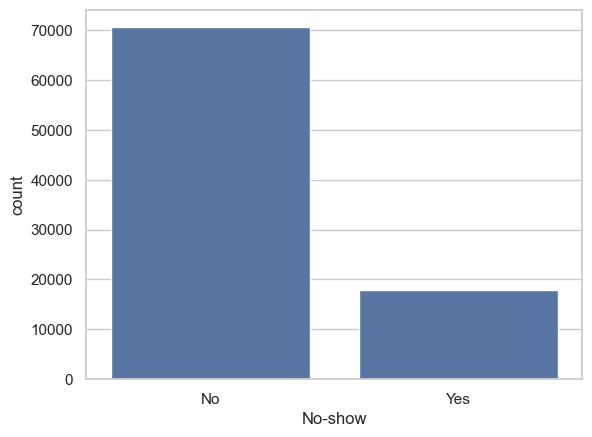

In [39]:
sns.countplot(x='No-show', data=df)

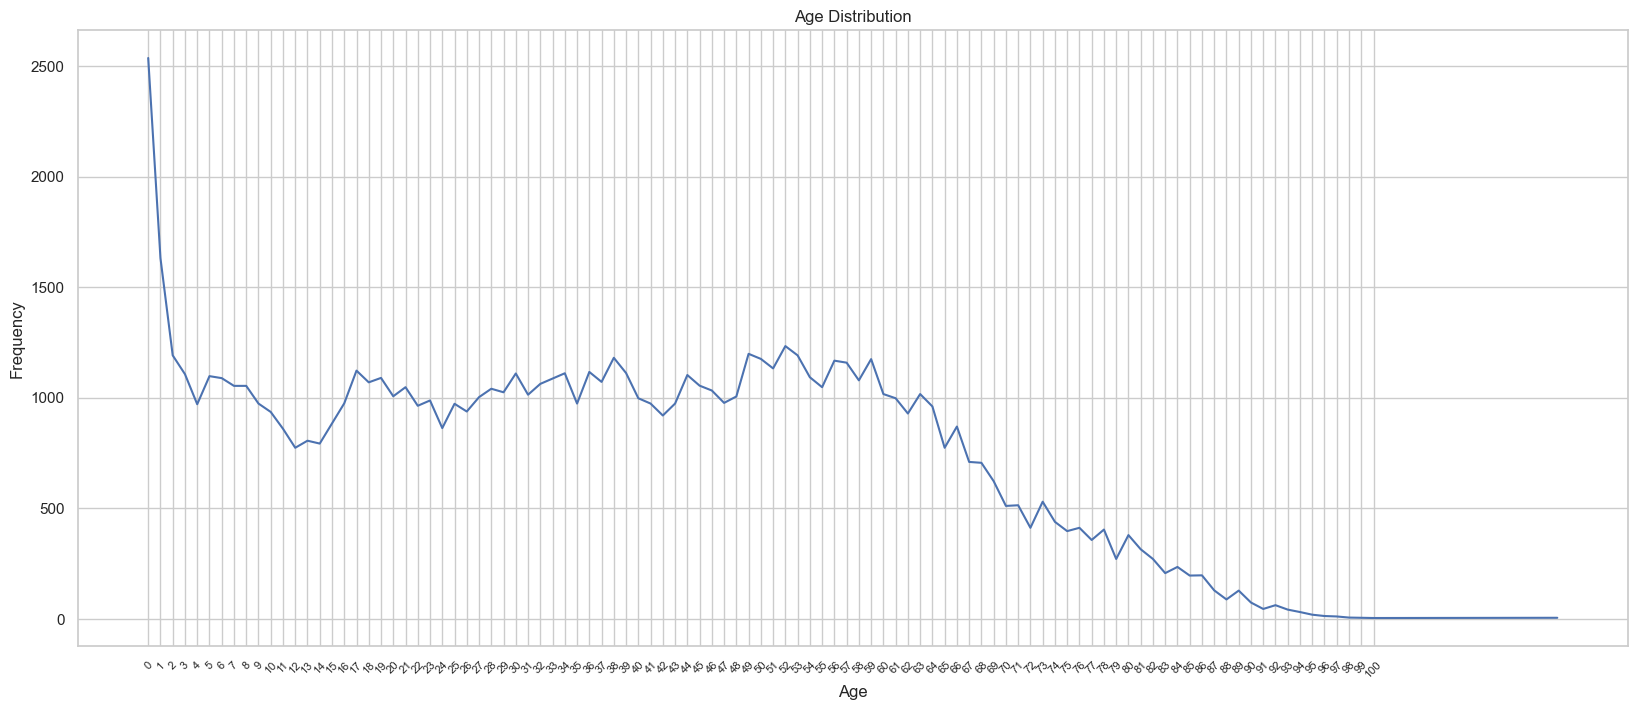

In [40]:
# Count the frequency of each age
age_counts = df['Age'].dropna().value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(20, 8))  # Adjust the size for better visibility
sns.lineplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(fontsize=8, rotation=45)
plt.xticks(range(0, 101, 1))  # Set x-axis ticks to show every age
plt.show()

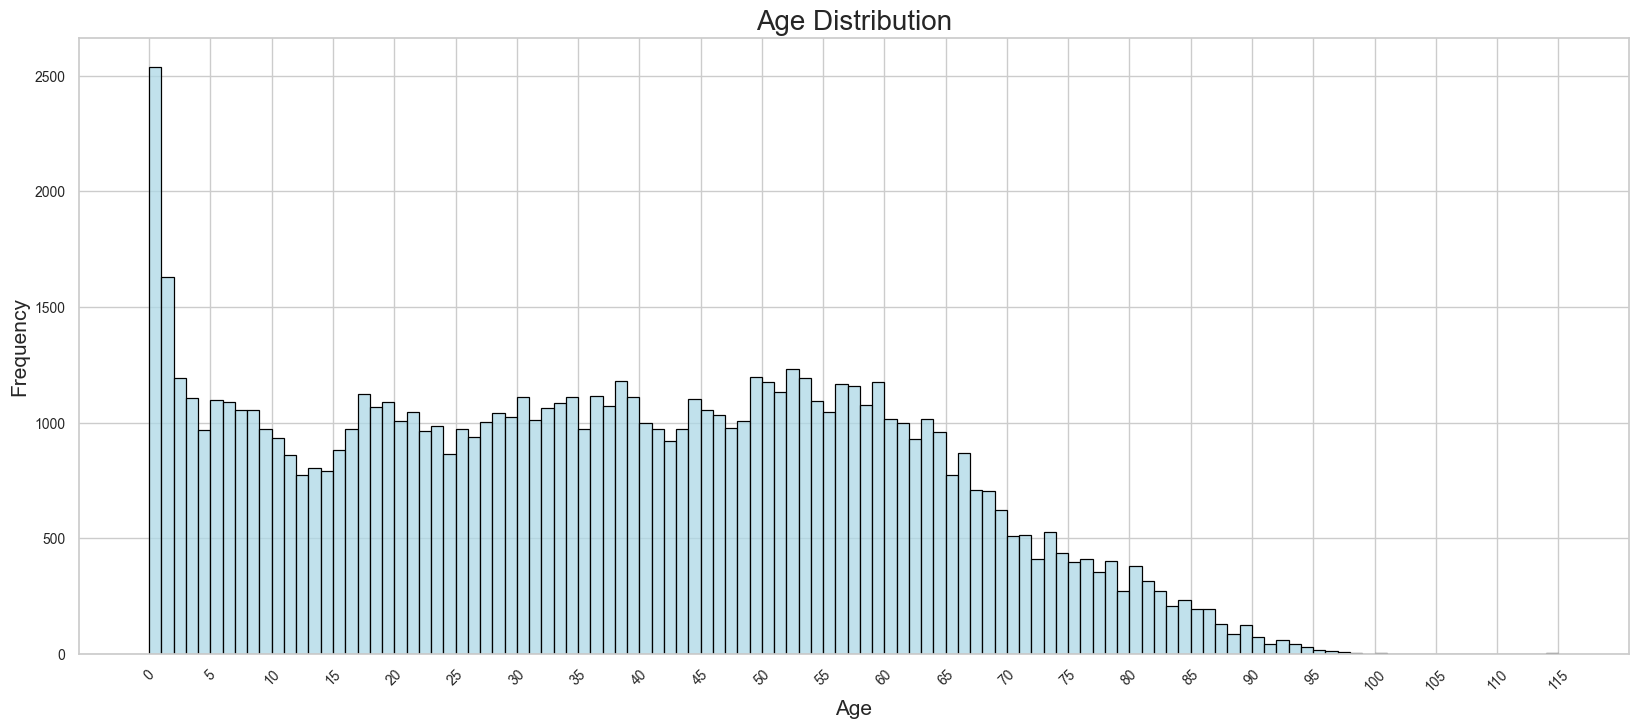

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'Age' is the column with age data
# Drop NA values from 'Age' column for accurate plotting
ages = df['Age'].dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot with adjusted aesthetics
plt.figure(figsize=(20, 8))

# Plotting the histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1, 1), kde=False, color="lightblue", edgecolor='black')

# Adding titles and labels
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Adjust x-axis ticks to show every age with better readability
plt.xticks(range(0, int(ages.max()) + 1, 5), fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

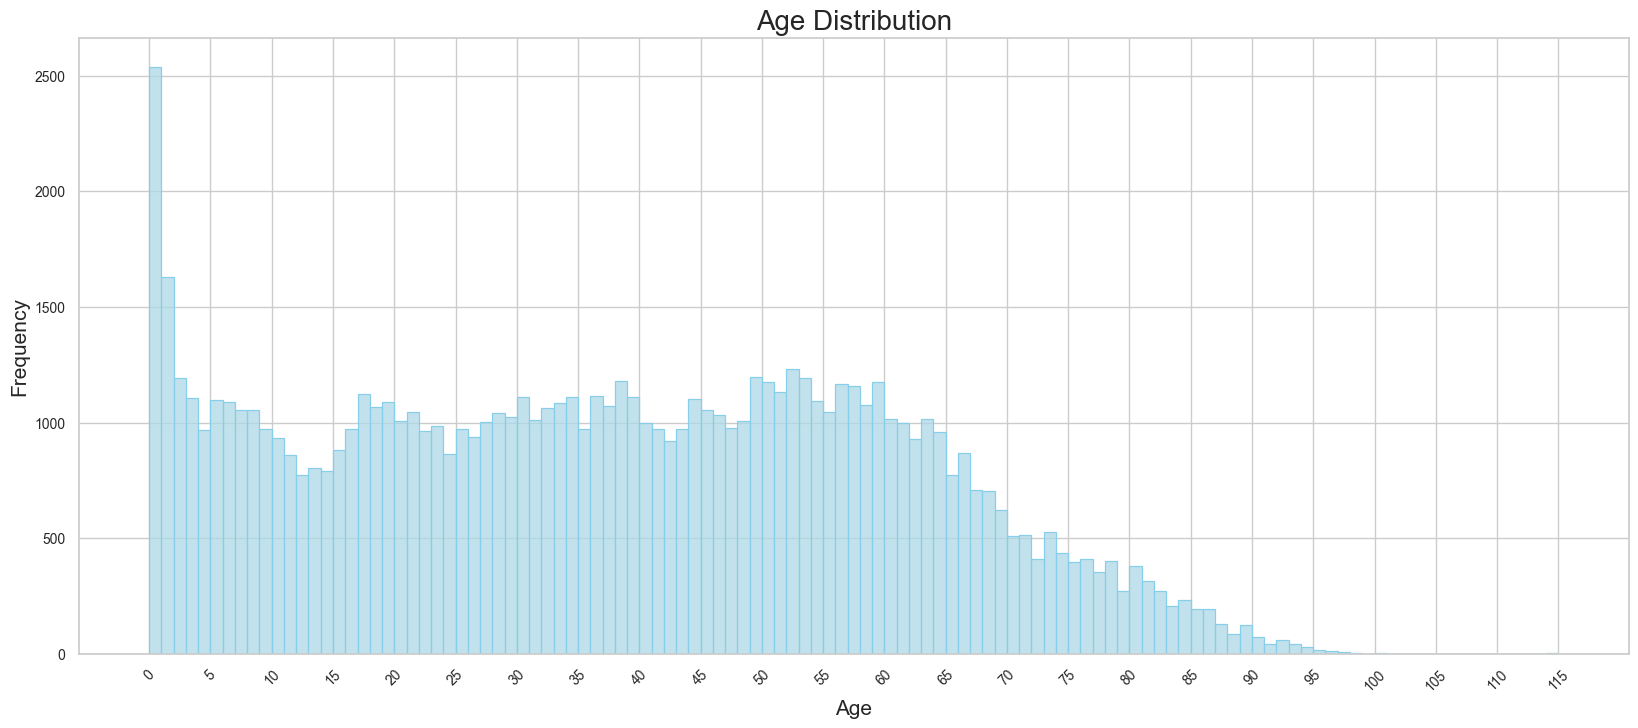

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'Age' is the column with age data
# Drop NA values from 'Age' column for accurate plotting
ages = df['Age'].dropna()

# Set the style
sns.set(style="whitegrid")

# Create the plot with adjusted aesthetics
plt.figure(figsize=(20, 8))

# Plotting the histogram
sns.histplot(ages, bins=range(int(ages.min()), int(ages.max()) + 1, 1), kde=False, color="lightblue",edgecolor='skyblue')

# Adding titles and labels
plt.title('Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Adjust x-axis ticks to show every age with better readability
plt.xticks(range(0, int(ages.max()) + 1, 5), fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

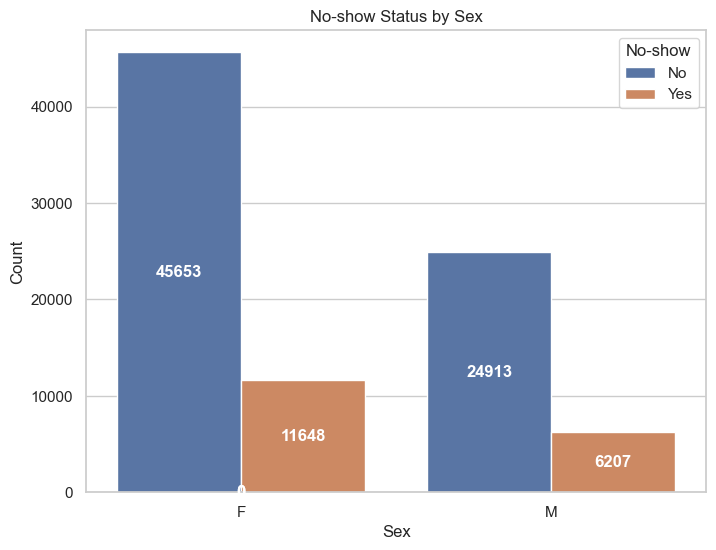

In [43]:
# Visualization of No-Shows by Sex
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='No-show', data=df)
plt.title('No-show Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')

# Adding the count numbers inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', color='white', fontweight='bold')

plt.show()

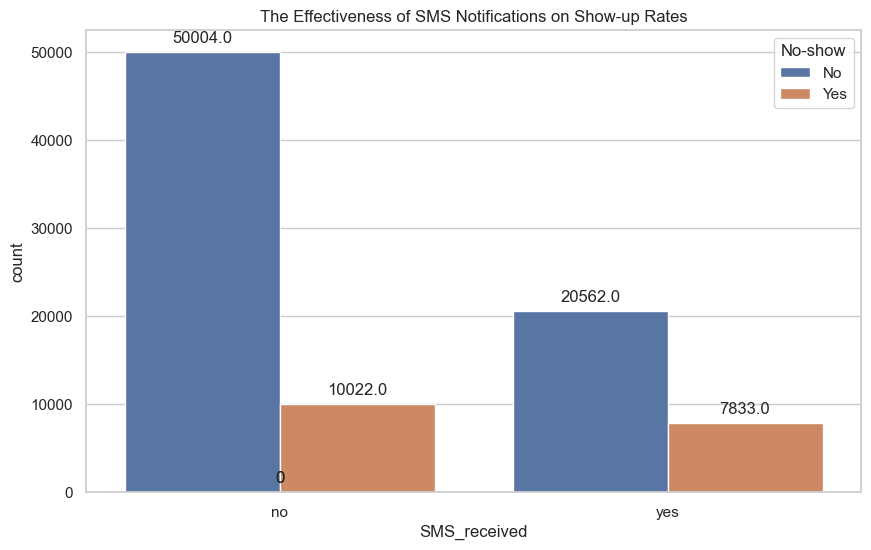

In [44]:
#Does receiving an SMS make more people show up to their appointments?

#sns.countplot(x='SMS_received', hue='No-show', data=df)
#plt.title('The Effectiveness of SMS Notifications on Show-up Rates')
#plt.xlabel('SMS Received')
#plt.ylabel('Count')

plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# interpretation: it doesn't make much of a difference... 
# also: no-show = 0 means the patient showed up

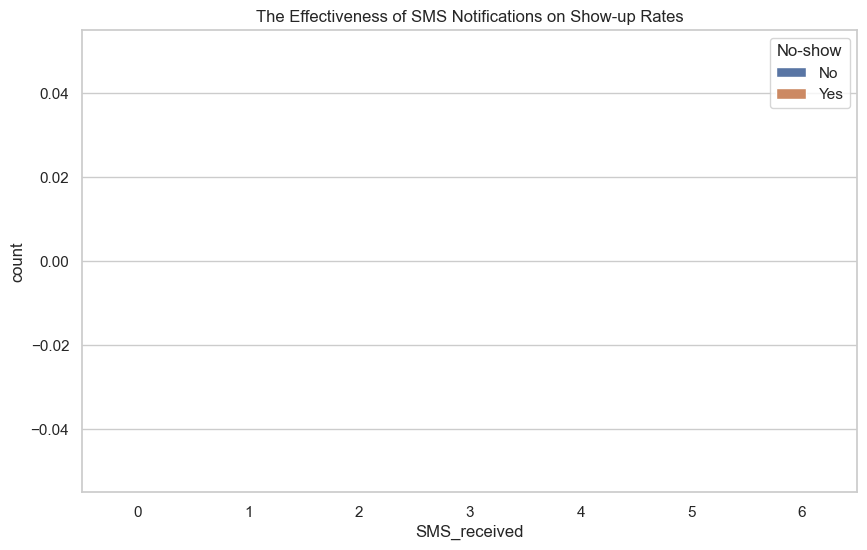

In [45]:
# Replace 'SMS_received' numerical values with more descriptive labels
df['SMS_received'] = df['SMS_received'].map({0: 'Not Received', 1: 'Received'})

plt.figure(figsize=(10, 6))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()
for p in ax.patches:
    # Check if the height is 0 and skip the annotation if it is
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

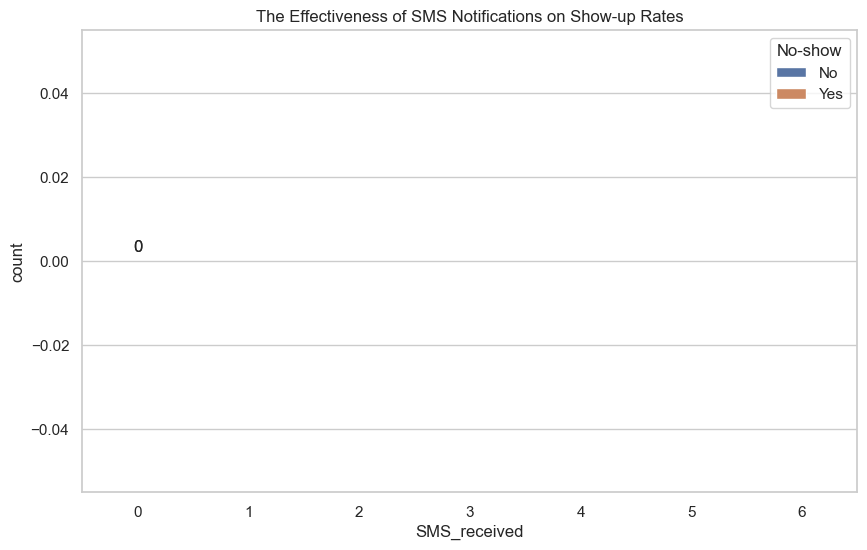

In [46]:
#Does receiving an SMS make more people show up to their appointments?

#sns.countplot(x='SMS_received', hue='No-show', data=df)
#plt.title('The Effectiveness of SMS Notifications on Show-up Rates')
#plt.xlabel('SMS Received')
#plt.ylabel('Count')

plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('The Effectiveness of SMS Notifications on Show-up Rates')

ax = plt.gca()  # Get the current axes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# interpretation: it doesn't make much of a difference... 
# also: no-show = 0 means the patient showed up

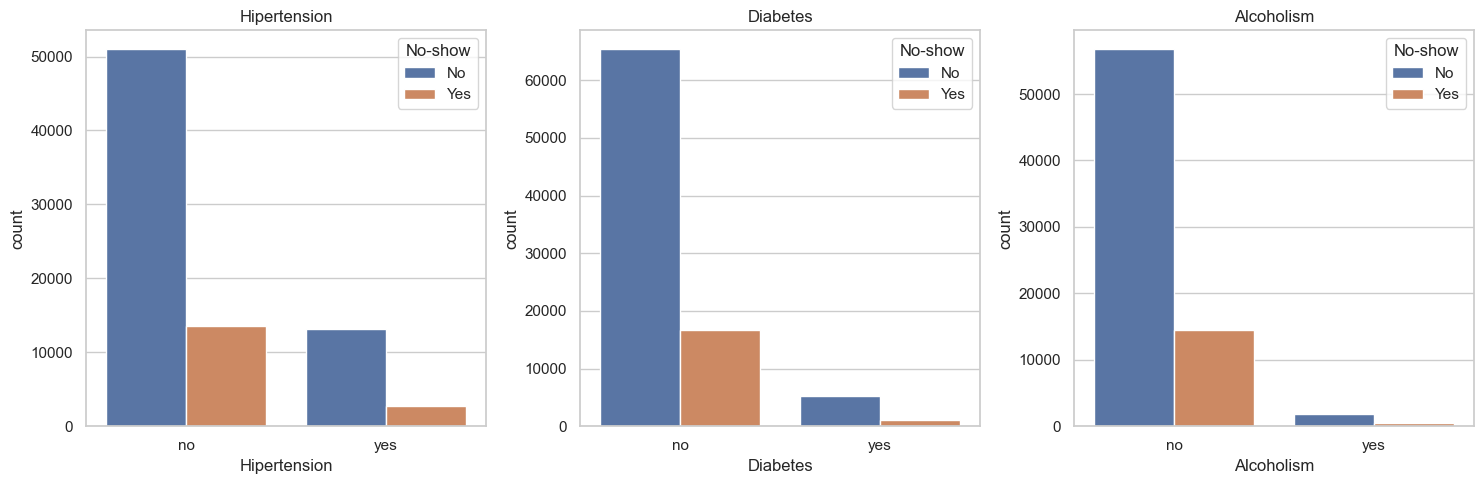

In [47]:


sns.set(style="whitegrid")  # Optional: Set the style

# Create a subplot for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust the number of columns as needed

# Plot for 'Hipertension'
sns.countplot(x='Hipertension', hue='No-show', data=df, ax=axes[0])
axes[0].set_title('Hipertension')

# Plot for 'Diabetes'
sns.countplot(x='Diabetes', hue='No-show', data=df, ax=axes[1])
axes[1].set_title('Diabetes')

# Plot for 'Alcoholism'
sns.countplot(x='Alcoholism', hue='No-show', data=df, ax=axes[2])
axes[2].set_title('Alcoholism')


plt.tight_layout()  # Optional: Adjust layout for better spacing
plt.show()

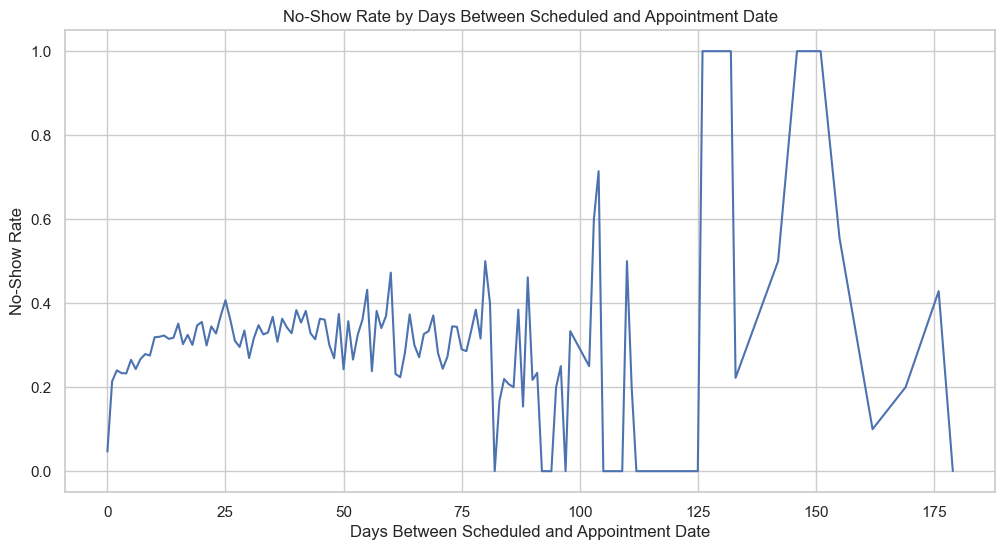

In [48]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate']).dt.date
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
df['DaysBetween'] = (pd.to_datetime(df['AppointmentDate']) - pd.to_datetime(df['ScheduledDate'])).dt.days

# Remove cases where the difference is negative (errors in data)
df = df[df['DaysBetween'] >= 0]

# Group by 'DaysBetween' and calculate no-show rate
no_show_rate = df.groupby('DaysBetween')['No-show'].apply(lambda x: (x == 'Yes').mean())

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=no_show_rate.index, y=no_show_rate.values)
plt.title('No-Show Rate by Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

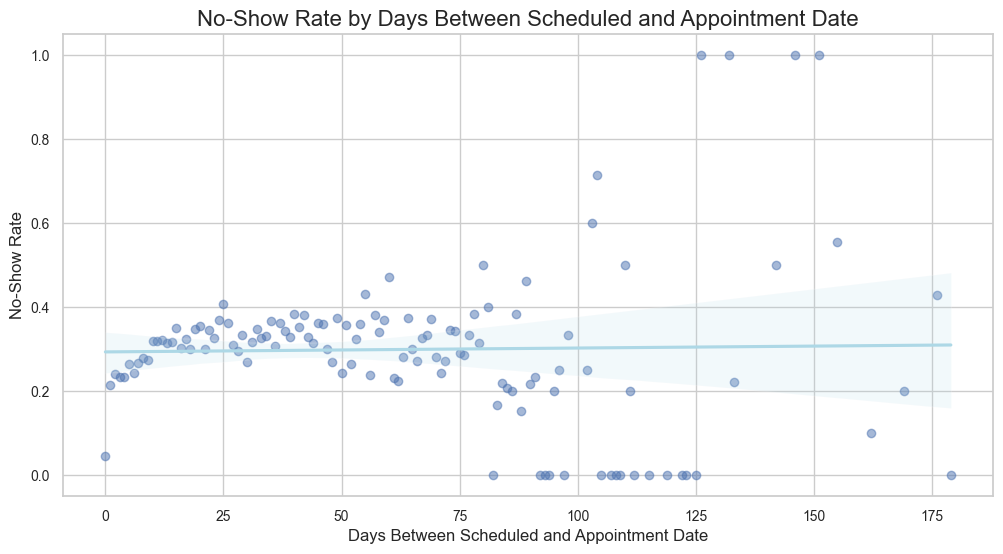

In [49]:

plt.figure(figsize=(12, 6))

# Scatter plot with a regression line to show the trend
sns.regplot(x=np.array(no_show_rate.index), y=no_show_rate.values, scatter_kws={'alpha':0.5}, line_kws={'color': 'lightblue'})

plt.title('No-Show Rate by Days Between Scheduled and Appointment Date', fontsize=16)
plt.xlabel('Days Between Scheduled and Appointment Date', fontsize=12)
plt.ylabel('No-Show Rate', fontsize=12)

# Optionally, adjust the x-axis limits if the data is too spread out
# plt.xlim(0, max_days_limit) # Uncomment and set max_days_limit to a suitable value

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

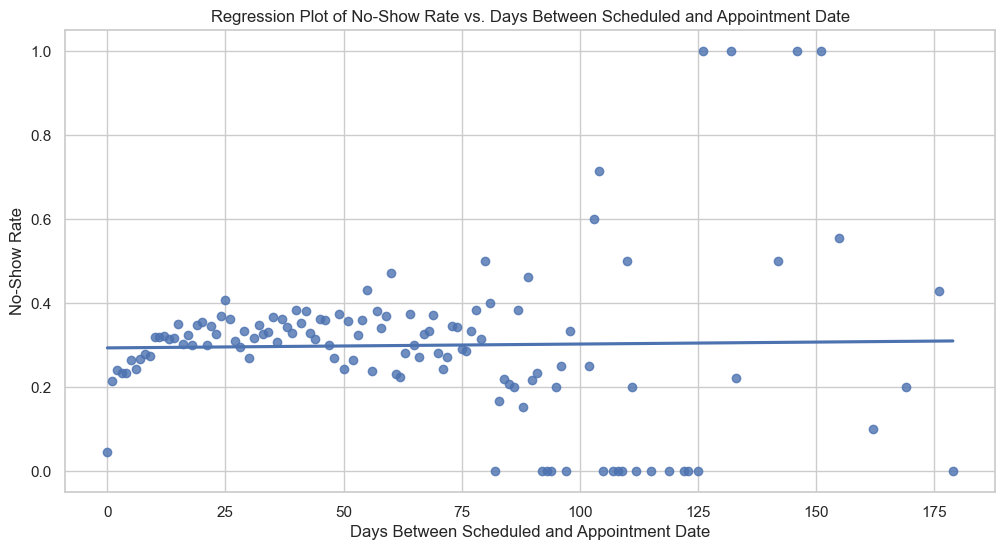

In [50]:
# Convert the no_show_rate Series to a DataFrame for easier plotting
no_show_rate_df = no_show_rate.reset_index()

# Create the regression plot
plt.figure(figsize=(12, 6))
sns.regplot(x='DaysBetween', y='No-show', data=no_show_rate_df, logistic=True, ci=None)

plt.title('Regression Plot of No-Show Rate vs. Days Between Scheduled and Appointment Date')
plt.xlabel('Days Between Scheduled and Appointment Date')
plt.ylabel('No-Show Rate')
plt.show()

### 3.3 Analysis of missing data: 
- Viewing how many missing values in the dataset (For each column and total number)
- Visualization of missing values


In [51]:
missing_values = df.isnull().sum()

print("Total Missing Values in Each Column:")
print(missing_values)

Total Missing Values in Each Column:
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8806
Community          10713
SocialWelfare      12518
Hipertension        8021
Diabetes               0
Alcoholism         14888
Handcap                0
SMS_received       88417
No-show                0
DaysBetween            0
dtype: int64


In [52]:
total_missing = df.isnull().sum().sum()

print("Total Missing Values in the Entire DataFrame:", total_missing)

Total Missing Values in the Entire DataFrame: 143363


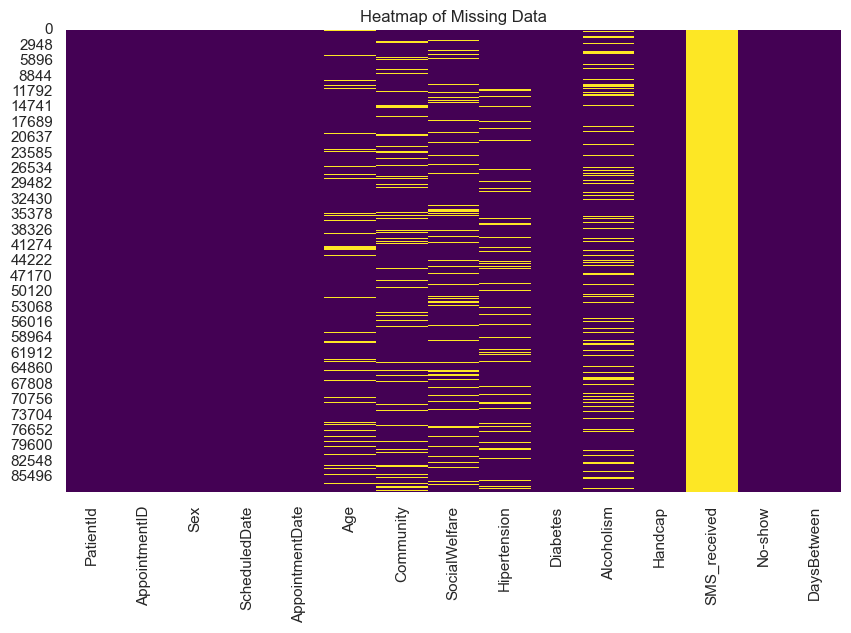

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

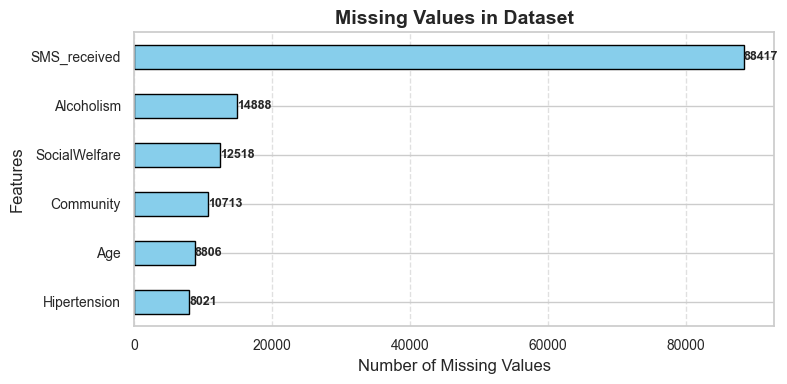

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)  # Sort values for an organized look

plt.figure(figsize=(8, 4))  # Adjusted figure size for clarity
ax = missing_values.plot(kind='barh', color='skyblue', edgecolor='black')  # Horizontal bar chart for better readability
plt.title('Missing Values in Dataset', fontsize=14, fontweight='bold')  # Enhanced title
plt.xlabel('Number of Missing Values', fontsize=12)  # X-axis label
plt.ylabel('Features', fontsize=12)  # Y-axis label
plt.xticks(fontsize=10)  # X-axis ticks
plt.yticks(fontsize=10)  # Y-axis ticks
plt.tight_layout()  # Adjust layout
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid

# Loop over the bars: ax.patches is the list of rectangles/bars
for bar in ax.patches:
    # Using bar.get_width() to get the value, and bar.get_y() + bar.get_height()/2. to place the text in the middle of the bar
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2., 
            f'{int(bar.get_width())}',  # Format the number as an integer
            va='center', ha='left', fontsize=9, fontweight='bold')  # Adjust alignment, font size, and weight

plt.show()


### Data Preparation
#### Questions:
### - How and why did you select the features?
#### First we used all features to have a base model and see what the score is.(show feature importance diagram) 
### - Did you derive new features?
### - How did you deal with missing data?
### - How and why did you transform the data?
#### We used one hot encoding (to allow the model to learn from the categorical features), we derived the new feature 'DaysBetween' and we imputated the missing data.

In [55]:
# Import train test split and pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#### We derived the new feature 'DaysBetween' and now we use it.
#### We used all columns (all features).
#### How we split the data: 80% train size and 20% test size, and we stratified it.

In [56]:
from scipy.stats import chi2_contingency

# Defining your columns
columns = ['SMS_received', 'Handcap', 'Alcoholism', 'Diabetes', 'Hipertension', 'SocialWelfare', 'Community', 'Sex']

# Initialize a list to store results
results = []

# Looping through columns and performing Chi-Squared tests
for column in columns:
    contingency_table = pd.crosstab(df['No-show'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((column, chi2, p))

# Printing results
for result in results:
    print(f"{result[0]}: Chi-Squared: {result[1]}, p-value: {result[2]}")

ValueError: No data; `observed` has size 0.

Based on the results of your Chi-Squared tests, the decision to include or exclude features typically depends on the p-value. A common threshold for significance in many fields is 0.05, meaning that features with a p-value less than 0.05 are generally considered to have a statistically significant association with the target variable. Let's examine your results with this threshold in mind:

SMS_received:

Chi-Squared: 1419.39, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Suggests a strong association with the target variable.
Handcap:

Chi-Squared: 6.68, p-value: 0.1536
Interpretation: Not statistically significant. The association with the target is likely weak or non-existent.
Alcoholism:

Chi-Squared: 0.0079, p-value: 0.9290
Interpretation: Not statistically significant. Likely no meaningful association with the target.
Diabetes:

Chi-Squared: 16.65, p-value: 0.000045 (4.484e-05)
Interpretation: Statistically significant. Indicates an association with the target variable.
Hipertension:

Chi-Squared: 107.53, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Likely a strong association with the target variable.
SocialWelfare:

Chi-Squared: 74.40, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Indicates an association with the target variable.
Community:

Chi-Squared: 369.74, p-value: ~0 (extremely small)
Interpretation: Statistically significant. Suggests a strong association with the target variable.
Sex:

Chi-Squared: 1.83, p-value: 0.1763
Interpretation: Not statistically significant. Likely no strong association with the target.
Recommendations:
Include: SMS_received, Diabetes, Hipertension, SocialWelfare, Community

These features show statistically significant associations with the target variable and are likely to be informative for your model.
Exclude or Reconsider: Handcap, Alcoholism, Sex

These features do not show statistically significant associations with the target variable based on the Chi-Squared test. They might not be as informative for the model. However, consider other factors such as domain knowledge, possible interactions with other features, or different encoding techniques before deciding to exclude them entirely.


In [ ]:
features = ['Age', 'Community', 'Handcap', 'Sex', 'DaysBetween', 'SMS_received', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
num_features = ['Age', 'DaysBetween']
cat_features = ['Sex', 'SMS_received','Community', 'Handcap', 'Hipertension', 'Diabetes', 'Alcoholism', 'SocialWelfare']
X = df[features]
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Target variable y is what we are trying to predict or explain. y = target variable
#defined it by extracting it from the DataFrame

In [ ]:
X

,Age,Community,Handcap,Sex,DaysBetween,SMS_received,Hipertension,Diabetes,Alcoholism,SocialWelfare
0,NaN,RESISTÊNCIA,no,F,79,no,no,no,no,no
1,4.0,NaN,no,M,9,no,NaN,no,no,NaN
2,19.0,JARDIM DA PENHA,no,F,0,no,no,no,no,no
3,55.0,JESUS DE NAZARETH,no,F,0,no,yes,no,no,no
4,0.0,ITARARÉ,no,F,0,no,no,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...
88416,32.0,TABUAZEIRO,no,F,3,no,no,no,no,no
88417,7.0,NaN,no,M,7,yes,no,no,NaN,no
88418,50.0,MARIA ORTIZ,no,F,2,no,no,no,no,NaN
88419,39.0,PRAIA DO SUÁ,no,F,0,no,no,no,NaN,no


#### We dealt with missing dat aby imputing the mean for numerical feautures, and the mode for categorical features.

In [ ]:
# Definition of imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent') # mode = most frequent


In [ ]:
# Definition of OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)


#### Column Transformer:
#### We transformed the data by

In [ ]:
# Define Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer),
                                ('onehot', ohe)]), cat_features)
    ]
)

#### Read Test Data where we will use our prediction model on:

In [ ]:
# get test-data
test_df = pd.read_csv("C:/Users/Bayar/Desktop/Data_science/Datasets/test.csv")

#### Adjust fields with dates to date format:

In [ ]:
# Convert 'ScheduledDate' and 'AppointmentDate' to datetime, focusing only on the date part
test_df['ScheduledDate'] = pd.to_datetime(test_df['ScheduledDate']).dt.date
test_df['AppointmentDate'] = pd.to_datetime(test_df['AppointmentDate']).dt.date

# Calculate the time difference in days & create new column 'DaysBetween'
test_df['DaysBetween'] = (pd.to_datetime(test_df['AppointmentDate']) - pd.to_datetime(test_df['ScheduledDate'])).dt.days

## Models that we are using:


We used a combination of Random Forest and Decison Tree because we thought those would be the most effective methods.

#### - Decision Tree:
Works by splitting the dataset into subsets based on the most significant feature, with the goal to maximize the information gain or minimize impurity at each split. 

In [ ]:
# Instantiate Decision Tree

from sklearn.tree import DecisionTreeClassifier

dectree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini'))
])

In [ ]:
# Fit X train and Y train
dectree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
importances = dectree_pipeline.named_steps['classifier'].feature_importances_

In [ ]:
# Create a list of feature names from your preprocessor or original data
feature_names = [col for col in X.columns]  # Change this line to match your data

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importances
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Community, Importance: 0.30041743844280827
Feature: Age, Importance: 0.2539709293295385
Feature: Handcap, Importance: 0.05400181991843159
Feature: Sex, Importance: 0.023760963009920092
Feature: SMS_received, Importance: 0.0070883690337636635
Feature: SocialWelfare, Importance: 0.0037254897367637037
Feature: Alcoholism, Importance: 0.002156579804075332
Feature: Diabetes, Importance: 0.0015066679253977506
Feature: Hipertension, Importance: 0.0014568997095720283
Feature: DaysBetween, Importance: 6.0400526148769706e-05


When using decision tree feature selection the score did not improve. 

In [ ]:
y_pred_dectree = dectree_pipeline.predict(X_test)

In [ ]:
dectree_pipeline.named_steps['classifier'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set parameters
params = {
    # "classifier__ccp_alpha": [0.0, 1.0],
    'classifier__class_weight': [None, 'balanced'],
    "classifier__criterion": ["gini", "entropy"]
}

opt_dectree = GridSearchCV(dectree_pipeline, params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1, return_train_score=True)

In [ ]:
opt_dectree.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Age',
                                                                          'DaysBetween']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Sex',
                                                                          'SMS_received',
                                                                          'Community',
                                                                          'Handcap',
                                                                          'Hipertension',
                                                                          'Diabetes',
                                                                          'Alcoholism',
                                                                          'SocialWelfare'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
opt_dectree.best_params_

{'classifier__class_weight': None, 'classifier__criterion': 'gini'}

In [ ]:
y_pred_dectree_gridsearch = opt_dectree.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_gs_dectree = accuracy_score(y_test, y_pred_dectree_gridsearch)
f1_dectree = f1_score(y_test, y_pred_dectree_gridsearch, average='macro')
accuracy_gs_dectree, f1_dectree

(0.7400286511347357, 0.5760862640102564)

In [ ]:
y_pred_dectree_gs_final = opt_dectree.best_estimator_.predict(test_df)

In [ ]:
submission_grid = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': y_pred_dectree_gs_final})

In [ ]:
#Submission GridSearch

filepath = 'Submission_1GridSearch_dectree.csv'
submission_grid.to_csv(filepath, index=False)

#### XGBoost

Our pipeline has 3 major parts, and on the first step we preprocess our data which includes missing value imputation and categorical encoding.

Then, because we observed that there is an imbalance in the data, we applied the sintetic minority oversampling technique (SMOTE for short).

The preprocessed data is being fed into an XGBoost classifier with the objective to perform binary classification. 

To find optimal parameters for the model, we run a grid search on a number of hyperparameters, which resulted in the best performing model considering the f1 score.

The cross-validation was done with two folds because we optimize the time to be able to run more experiments. 

In [ ]:
# Import libraries
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Create an imbalanced pipeline with preprocessing, SMOTE, and XGBoost classifier
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    # ('classifier', DecisionTreeClassifier(criterion='gini', random_state=42)),
    # ('classifier', RandomForestClassifier(random_state=42))
    ('classifier', xgb.XGBClassifier(objective='binary:logistic'))
    # ('classifier', GradientBoostingClassifier())
    # svm 
])

# Define a grid of hyperparameters for XGBoost classifier
param_grid = {
    #'classifier__n_estimators': [100, 200],
    'classifier__criterion': ['gini', 'entropy'],
    #'classifier__max_depth': [None, 2, 4, 6],
    # xgb params:
   'classifier__n_estimators': [100, 200],
   #'classifier__learning_rate': [0.01, 0.1, 0.2],
   'classifier__max_depth': [3, 4, 5, 6],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    #'classifier__scale_pos_weight': [1, 2, 3],
    #'classifier__reg_alpha': [0, 0.1, 0.5, 1],
   #'classifier__reg_lambda': [0, 0.1, 0.5, 1],
}

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define a scoring metric (macro F1 score)
macro_f1_scorer = make_scorer(f1_score, average='macro')

# Perform Grid Search Cross-Validation to find the best hyperparameters
xgb_gs = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid,
                           scoring=macro_f1_scorer, cv=2, n_jobs=-1)

# Fit the model using the training data
xgb_gs.fit(X_train, y_train_encoded)

# Retrieve the best-performing XGBoost model from the grid search
best_xgb_model = xgb_gs.best_estimator_

KeyboardInterrupt: 

In [ ]:
best_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoh...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
xgb_predictions = best_xgb_model.predict(X_test)
xgb_predictions = label_encoder.inverse_transform(xgb_predictions)
xgb_predictions_final = best_xgb_model.predict(test_df)
xgb_predictions_final = label_encoder.inverse_transform(xgb_predictions_final)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_xgb = accuracy_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions, average='macro')
accuracy_xgb, f1_xgb

(0.6981452160144763, 0.6067294590644432)

In [ ]:
# xgb: (0.6785041091759029, 0.6003212303552579)
# dec tree: (0.6484958154263741, 0.5882298290283661)
# randomforest (0.6100052778406092, 0.5621804231169687)

In [ ]:
submission_xgb = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': xgb_predictions_final})
filepath = 'Submission_xgbv4.csv'
submission_xgb.to_csv(filepath, index=False)

#### Random Forest:
It is an ensemble method that builds multiple decision trees and combines their predictions. Each tree is trained on a random subset and selects features at each split. The final prediction is determined by averaging.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Fit X train and Y train
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict X test
y_pred_randomforest = rfc_pipeline.predict(X_test)

In [ ]:
rfc_pipeline.named_steps['classifier'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Predictions:

In [ ]:
# Predict for the Decision Tree Model
predictions_test_dectree = dectree_pipeline.predict(test_df)

In [ ]:
# Predict for the Random Forest Model
predictions_test_randomforest = rfc_pipeline.predict(test_df)

In [ ]:
combined_df = pd.concat([test_df, X_test])
# Here I Added DaysBetween in test_df

In [ ]:
submission_dectree = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_dectree})

In [ ]:
submission_randomforest = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': predictions_test_randomforest})

#### Grid Search:
#### Used to find the best performing set. That is how we decided to optimize the hyperparameters. We used Grid search to search for the best hyperparameters.
#### Sweet spot between underfitting and overfitting is found with Grid Search.

### Submissions:
### Done with both Decision Tree, and Random Forest to see which gives best results.

In [ ]:
#Submission Dec Tree

filepath = 'Submission_dectree.csv'
submission_dectree.to_csv(filepath, index=False)

In [ ]:
#Submission Random Forest

filepath = 'Submission_randomforest.csv'
submission_randomforest.to_csv(filepath, index=False)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22106 entries, 0 to 22105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        22106 non-null  float64
 1   AppointmentID    22106 non-null  int64  
 2   Sex              22106 non-null  object 
 3   ScheduledDate    22106 non-null  object 
 4   AppointmentDate  22106 non-null  object 
 5   Age              19955 non-null  float64
 6   Community        19461 non-null  object 
 7   SocialWelfare    19043 non-null  object 
 8   Hipertension     20089 non-null  object 
 9   Diabetes         22106 non-null  object 
 10  Alcoholism       18371 non-null  object 
 11  Handcap          22106 non-null  object 
 12  SMS_received     22106 non-null  object 
 13  DaysBetween      22106 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.4+ MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17684 entries, 59208 to 19786
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AppointmentID  17684 non-null  int64  
 1   Age            15902 non-null  float64
 2   Community      15527 non-null  object 
 3   Handcap        17684 non-null  object 
 4   Sex            17684 non-null  object 
 5   DaysBetween    17684 non-null  int64  
 6   SMS_received   17684 non-null  object 
 7   Hipertension   16137 non-null  object 
 8   Diabetes       17684 non-null  object 
 9   Alcoholism     14731 non-null  object 
 10  SocialWelfare  15192 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.6+ MB


#### Confusion Matrix for both models:

##### Decision Tree:

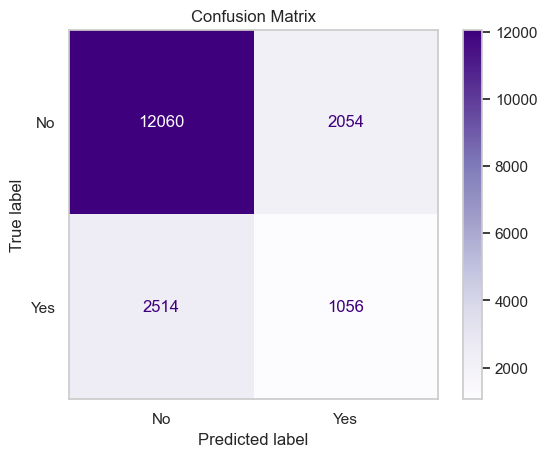

In [ ]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_dectree, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)

# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

##### Random Forest:

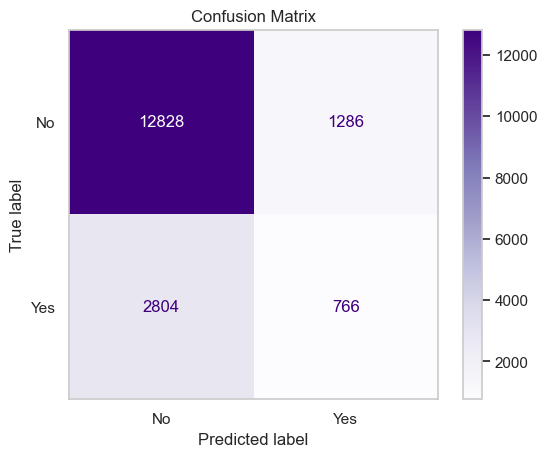

In [ ]:
# Create a confusion matrix that compares the predicted labels with the correct labels of the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels=['No', 'Yes']

class_labels = rfc_pipeline.named_steps['classifier'].classes_

cm = confusion_matrix(y_test, y_pred_randomforest, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=display_labels)
# Display confusion matrix without grid lines
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Purples, include_values=True, values_format='d')  # You can change the colormap if needed
plt.title('Confusion Matrix')
plt.grid(False) 
plt.show()

#### Model Evaluation:

Are both false positives and false negatives equally important? No, False Negatives are more costly (predicting that someone would not miss their appointment, and them missing it, is more costly than predicting that they miss it and them not missing).
How could you adjust for different costs of the errors?
SMOTE

##### Decision Tree Classification Report:

In [ ]:
# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

          No       0.83      0.85      0.84     14114
         Yes       0.34      0.30      0.32      3570

    accuracy                           0.74     17684
   macro avg       0.58      0.58      0.58     17684
weighted avg       0.73      0.74      0.73     17684



##### Random Forest Classification Report:

In [ ]:
# Print classificatino report
print(classification_report(y_test, y_pred_randomforest))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86     14114
         Yes       0.37      0.21      0.27      3570

    accuracy                           0.77     17684
   macro avg       0.60      0.56      0.57     17684
weighted avg       0.73      0.77      0.74     17684



#### Accuracy Score for each model:

In [ ]:
# Accuracy score for Decision Tree:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred_dectree)
print(accuracy1)

0.7416874010404886


In [ ]:
# Accuracy score for Random Forest:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred_randomforest)
print(accuracy2)

0.7687174847319611


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set parameters
params = {
    "classifier__n_estimators": [100, 200, 300],
    'classifier__class_weight': [None, 'balanced'],
    # "classifier__max_depth": range(1, 12),  #This means max dept is a hyperparameter of the classifier
    "classifier__criterion": ["gini", "entropy"]
}

In [ ]:
opt_rfc = GridSearchCV(rfc_pipeline, params, scoring="accuracy", n_jobs=-1, cv=10, verbose=1, return_train_score=True)
opt_rfc.fit(X_train, y_train)

In [ ]:
opt_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Age',
                                                                          'DaysBetween']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Sex',
                                                                          'SMS_received',
                                                                          'Community',
                                                                          'Handcap',
                                                                          'Hipertension',
                                                                          'Diabetes',
                                                                          'Alcoholism',
                                                                          'SocialWelfare'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# gridseaarch fits the models with different cofnigurations and finds the one with the best parameters (that produces the highest accuracy in this case)
# the best parameters can be accessed the following way:

opt_rfc.best_params_

{'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__n_estimators': 300}

In [ ]:
opt_rfc.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'DaysBetween']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'SMS_received',
                                                   'Community', 'Handcap',
                                                   'Hipertension', 'Diabetes',
                                                   'Alcoholism',
                                                   'SocialWelfare'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [ ]:
y_pred1 = opt_rfc.best_estimator_.predict(X_test)

In [ ]:
accuracy3 = accuracy_score(y_test, y_pred1)
print(accuracy3)

0.7684347432707532


In [ ]:
y_pred_final = opt_rfc.best_estimator_.predict(test_df)

In [ ]:
submission_grid = pd.DataFrame({'AppointmentID': test_df['AppointmentID'], 'No-show': y_pred_final})

In [ ]:
#Submission GridSearch

filepath = 'Submission_1GridSearch.csv'
submission_grid.to_csv(filepath, index=False)